# BÀI THỰC HÀNH SỐ 1

Họ và tên: **Phạm Thiện Bảo**

MSSV: **20521107**

Lớp: **IS252.N22.HTCL**

## Thực hiện lại phần hướng dẫn chung

### Yêu cầu lập trình

1. Nhập dữ liệu và thống kê những thông tin cơ bản của các thuộc tính.

In [127]:
# Khai báo thư viện
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [128]:
# Load dữ liệu
with open('D:/Desktop/Lab/Lab 01/Data/titanic.csv') as f:
    df = pd.read_csv(f, dtype= {'age': np.float64,'sibsp': np.int64,'parch': np.int64})

In [129]:
# Thống kê thông tin của dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [130]:
#Thống kê chỉ số của các thuộc tính định lượng
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


2. Liệt kê danh sách 5 thuộc tính có số lượng giá trị rỗng nhiều nhất.

In [131]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)


,Total,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1


3. Vẽ biểu đồ khảo sát sự liên quan giữa thuộc tính Độ tuổi (age), Giới tính (sex) và thuộc tính quyết định – khả năng sống sót (survived) và đưa ra nhận xét.

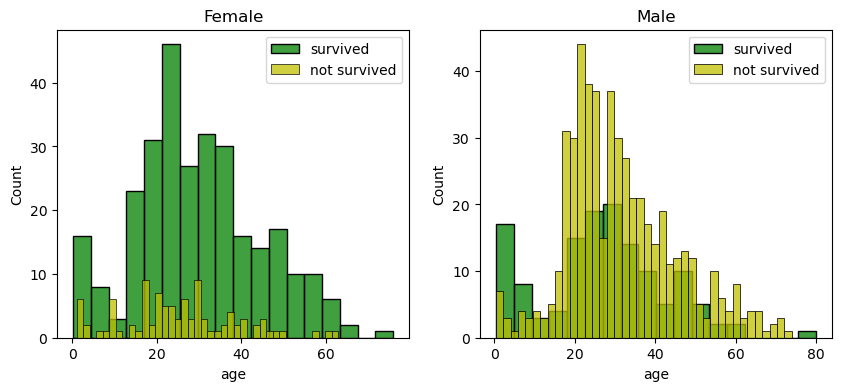

In [132]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = df[df['sex']=='female']
men = df[df['sex']=='male']

ax = sns.histplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color='g')
ax = sns.histplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color='y')
ax.legend()

ax.set_title('Female')

ax = sns.histplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde =False, color='g')
ax = sns.histplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde =False, color='y')
ax.legend()

_ = ax.set_title('Male')


Từ biểu đồ trên có thể rút ra vài nhận xét như sau: 

   + Xác suất nam sống sót cao ở tuổi từ 1 đến 10 
   
   + Cơ hội sống sót của nữ cao hơn từ 12 đến 40 tuổi 
   
   + Xác suất nam không sống sót cao nhất ở độ tuổi từ 18 đến 27. 
   
   + Nhìn chung tỷ lệ sống sót của nữ ở các lứa tuổi đều có phần nhỉnh hơn nam.

4. Vẽ biểu đồ khảo sát sự liên quan giữa thuộc tính Cổng lên tàu (embarked) và loại vé (pclass) với khả năng sống sót (survived), phân biệt theo Giới tính (sex) và đưa ra nhận xét.

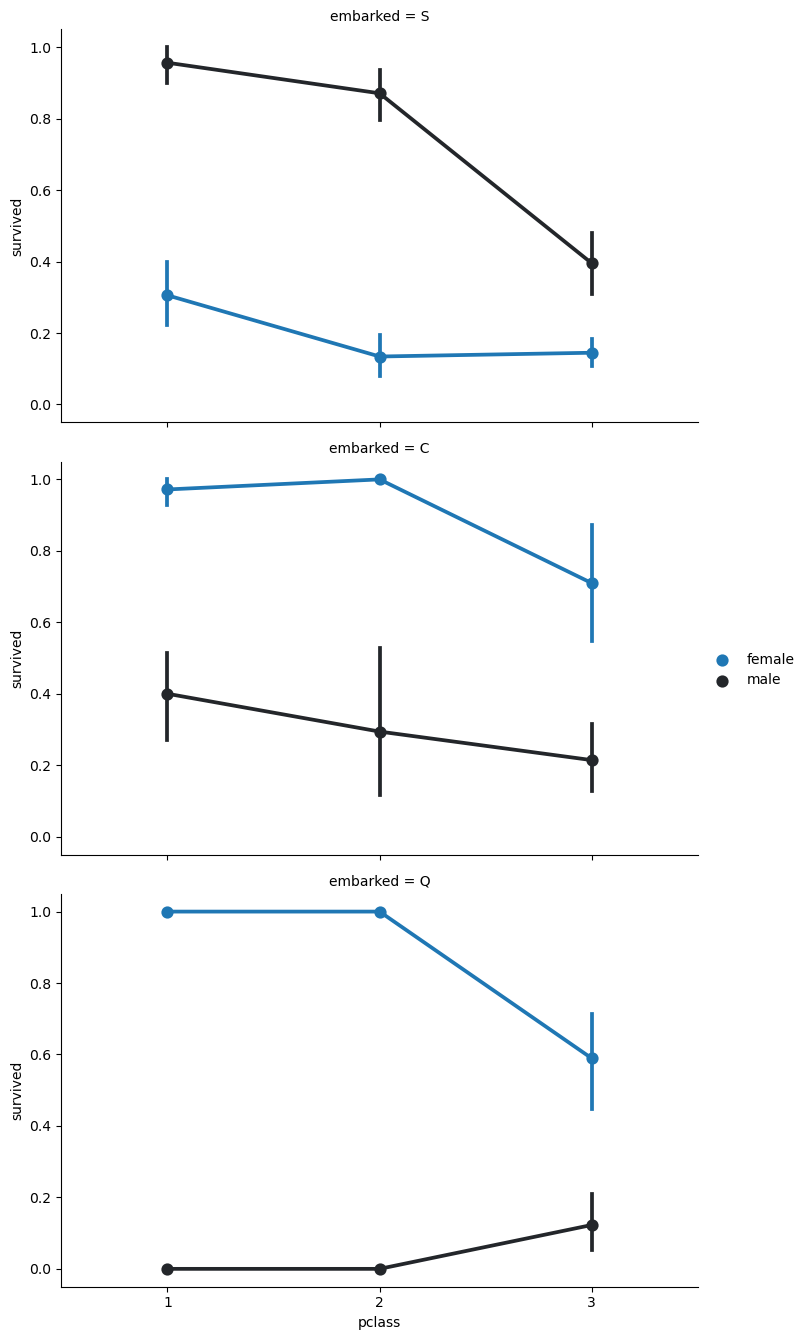

In [133]:
FacetGrid=sns.FacetGrid(df, row='embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None, order=None, hue_order=None) 
FacetGrid.add_legend()

**Nhận xét**: Từ biểu đồ trên có thể thấy được, thuộc tính Cổng lên tàu có thể liên quan đến khả năng sống sót và phụ thuộc vào giới tính Phụ nữ lên tàu ở cổng Q và cổng S có cơ hội sống cao hơn và ngược lại, lên tàu ở cổng C phụ nữ có tỉ lệ chết cao hơn. 
Đồng nghĩa với tỉ lệ sống sót của đàn ông lên tàu ở cổng C cao hơn so với cổng Q và S.

Loại vé cũng có thể liên quan đến tỉ lệ sống sót, vì thế, tiếp tục tìm hiểu kỹ hơn về sự phụ thuộc giữa thuộc tính này với thuộc tính quyết định.

<AxesSubplot:xlabel='pclass', ylabel='survived'>

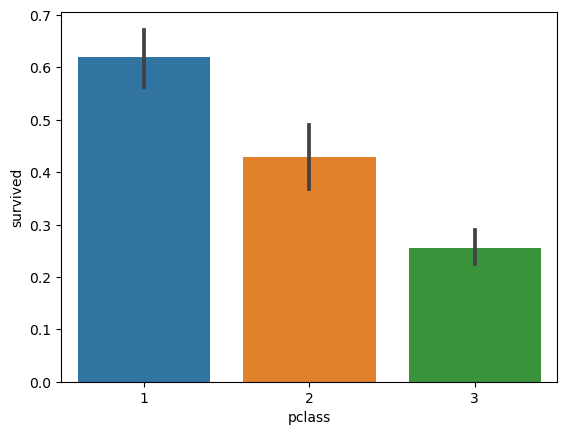

In [134]:
sns.barplot(x='pclass',y='survived',data=df)

Từ biểu đồ này có thể thấy được rõ ràng tỷ lệ sống sót của loại vé 1 là cao nhất.

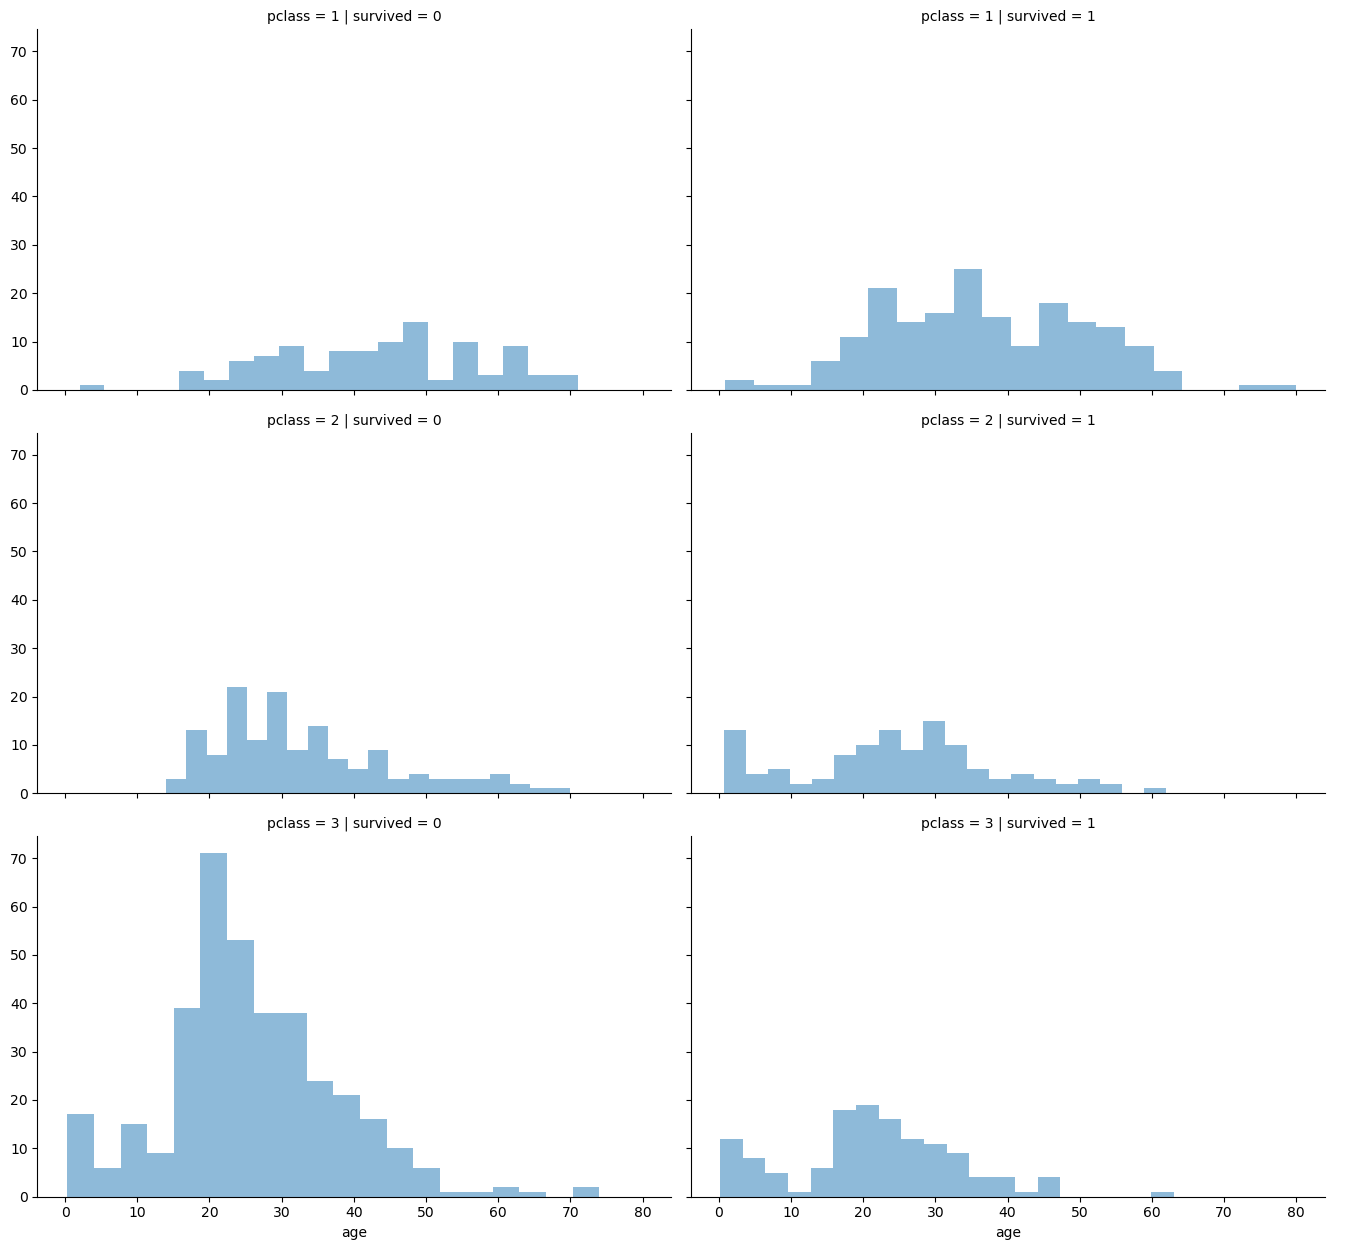

In [135]:
grid =sns.FacetGrid(df, col = 'survived', row='pclass', height=4.2, aspect=1.6)
grid.map(plt.hist,'age', alpha=.5, bins=20) 
grid.add_legend();

Biểu đồ trên đã thể hiện:
+ Tỷ lệ sống sót của người có loại vé 1 là cao nhất.
+ Những người có loại vé 3 thì có tỷ lệ không sống sót lớn nhất.

5. Thống kê số người đi cùng (anh chị em/vợ chồng hoặc cha mẹ/con cái) và khảo sát sự liên quan với thuộc tính quyết định và đưa ra nhận xét.

In [136]:
for dataset in [df]:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch'] 
    dataset.loc[dataset ['relatives'] > 0, 'not_alone'] = 0 
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1 
    dataset ['not_alone'] = dataset ['not_alone'].astype(int) 
df['not_alone'].value_counts()

1    790
0    519
Name: not_alone, dtype: int64

**Nhận xét**: 
+ Số người đi một mình là 790 người. 
+ Số người đi cùng người thân là 519 người.

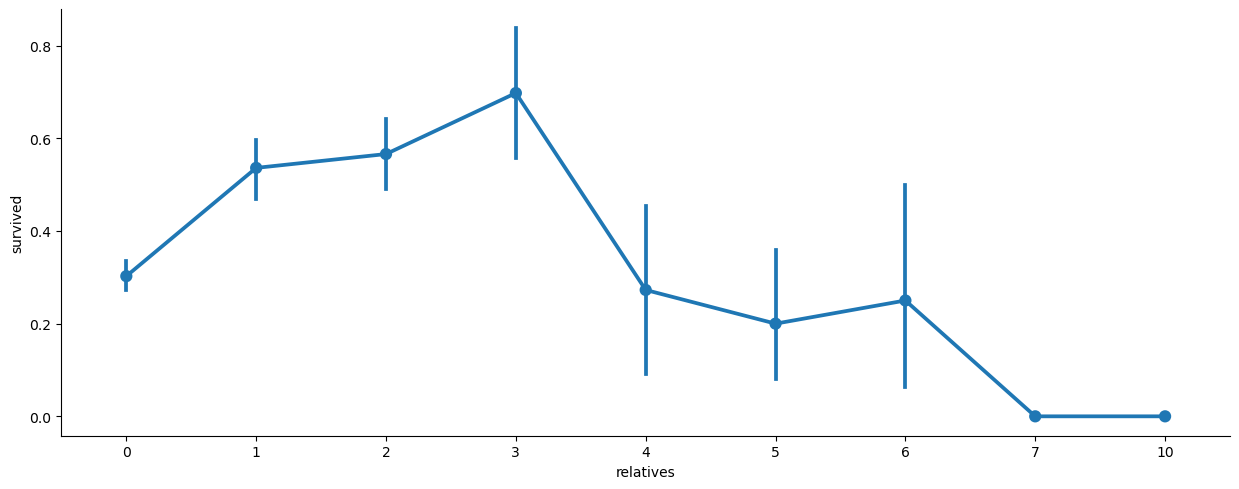

In [137]:
#Vẽ biểu đồ biểu diễn mối quan hệ giữa số người đi cùng và khả năng sống sót
axes= sns.catplot(x='relatives',y='survived',data=df,aspect=2.5,kind='point',)

**Nhận xét**:
+ Sơ đồ trên cho ta thấy, những người có 1 đến 3 người thân đi cùng có tỉ lệ sống sót cao hơn. 
+ Những người có 7 đến 10 người thân đi cùng thì có tỉ lệ sống thấp nhất.

6. Tiền xử lý dữ liệu

Đầu tiên, tiến hành xem xét các thuộc tính thiếu sót nhiều giá trị. Có thể xóa đi các thuộc tính body, cabin, boat, home.dest vì không có ảnh hưởng nhiều đến sự tồn tại của hành khách. Tuy nhiên, mỗi giá trị của thuộc tính cabin ví dụ như ‘C123’ có các ký tự đầu ‘C’ là boong mà hành khách đó đang đi. Dữ liệu này có thể hữu ích nên có thể tách ra, giữ lại trước khi xóa.

In [138]:
import re
deck = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}

for dataset in [df]:
    dataset['cabin'] = dataset['cabin'].fillna("U0")
    dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int)
df                              
#df = df.drop(['cabin'], axis=1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,relatives,not_alone,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,1,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,0,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,0,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,U0,C,NaN,328.0,NaN,1,0,8
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,U0,C,NaN,NaN,NaN,1,0,8
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,U0,C,NaN,304.0,NaN,0,1,8
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,U0,C,NaN,NaN,NaN,0,1,8


In [139]:
#Xóa cột cabin sau khi xử lý
df = df.drop(['cabin'], axis=1)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,relatives,not_alone,deck
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,NaN,"St Louis, MO",0,1,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,0,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,0,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0,3


Xem xét thuộc tính 'ticket', có thể thấy thuộc tính ticket có đến 929 giá trị khác nhau, có khả năng thuộc tính này sẽ không giúp ích được trong quá trình khai thác, ngược lại còn gây sai số cho thuật toán nên có thể xóa nó đi

In [140]:
df['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [141]:
#Xóa các thuộc tính không cần thiết
df = df.drop(['ticket'],axis=1)
df = df.drop(['body'],axis=1)
df = df.drop(['home.dest'],axis=1)
df = df.drop(['boat'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   fare       1308 non-null   float64
 8   embarked   1307 non-null   object 
 9   relatives  1309 non-null   int64  
 10  not_alone  1309 non-null   int32  
 11  deck       1309 non-null   int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 112.6+ KB


In [142]:
# Điền giá trị còn thiếu vào thuộc tính tuổi (age). 
# Các giá trị này sẽ được sinh ngẫu nhiên dựa vào giá trị trung bình, độ lệch chuẩn và số các giá trị còn thiếu.
for dataset in [df]:
    mean = df['age'].mean()
    std = df['age'].std()
    is_null = dataset['age'].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # Điền random giá trị Age vừa sinh
    age_slice = dataset['age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['age'] = age_slice
    dataset['age'] = df['age'].astype(int)
df['age'].isnull().sum()


0

In [143]:
# Điền giá trị còn thiếu vào thuộc tính Cổng lên tàu (embarked).
df['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [144]:
# Ta thấy, giá trị S là phổ biến nhất, nên có thể chọn nó đề điền vào các vị trí còn trống.
change = 'S'
for dataset in [df]:
    dataset['embarked'] = dataset['embarked'].fillna(change)

7. Biến đổi các thuộc tính 

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   int32  
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   fare       1308 non-null   float64
 8   embarked   1309 non-null   object 
 9   relatives  1309 non-null   int64  
 10  not_alone  1309 non-null   int32  
 11  deck       1309 non-null   int32  
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 107.5+ KB


In [146]:
# Chuyển đổi thuộc tính giá vé (fare) về kiểu nguyên.
for dataset in [df]:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

In [147]:
# Trích xuất thuộc tính danh hiệu (title) từ tên.
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in [df]:
    dataset['title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess', 'Capt', 'Col','Don', 'Dr',\
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
    dataset['title'] = dataset['title'].map(titles)
    dataset['title'] = dataset['title'].fillna(0)
df = df.drop(['name'], axis=1)

In [148]:
# Chuyển đổi thuộc tính giới tính (sex) và cổng lên tàu (embarked) thành số.
g = {"male":0,"female":1}
for dataset in [df]:
    dataset['sex'] = dataset['sex'].map(g)
    
p = {"S":0,"C":1,"Q":2}
for dataset in [df]:
    dataset['embarked'] = dataset['embarked'].map(p)

In [149]:
# Chia giá trị thuộc tính tuổi (age) thành 8 nhóm, sao cho số phần tử trong nhóm cân bằng.
for dataset in [df]:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[ dataset['age'] <= 11, 'age'] = 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] =1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] =2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] =3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] =4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 40), 'age'] =5
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 66), 'age'] =6
    dataset.loc[ dataset['age'] > 66, 'age'] = 7

In [150]:
df['age'].value_counts()

6    239
4    238
3    217
5    202
2    174
1    139
0     91
7      9
Name: age, dtype: int64

In [151]:
# Chia giá trị thuộc tính giá vé (fare) thành 6 nhóm
for dataset in [df]:
    dataset.loc[ dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] =1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare'] =2
    dataset.loc[(dataset['fare'] > 31) & (dataset['fare'] <= 99), 'fare'] =3
    dataset.loc[(dataset['fare'] > 99) & (dataset['fare'] <= 250), 'fare'] =4
    dataset.loc[ dataset['fare'] > 250, 'age'] = 5
    dataset['fare'] = dataset['fare'].astype(int)

In [152]:
df['fare'].value_counts()

0      361
2      325
1      312
3      227
4       67
262      7
263      6
512      4
Name: fare, dtype: int64

8. Tạo thuộc tính mới

In [153]:
# Tạo thuộc tính tuổi * loại vé (age_class)
for dataset in [df]:
     dataset['age_class'] = dataset['age']*dataset['pclass']

In [154]:
# Tạo thuộc tính giá vé trên mỗi người (fare_per_person)
for dataset in [df]:
    dataset['fare_per_person'] = dataset['fare']/(dataset['relatives']+1)
    dataset['fare_per_person'] = dataset['fare_per_person'].astype(int)


In [155]:
# Xem 5 mẫu dữ liệu đầu tiên sau khi hoàn thành xử lý
df.head(5)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck,title,age_class,fare_per_person
0,1,1,1,4,0,0,4,0,0,1,2,2,4,4
1,1,1,0,0,1,2,4,0,3,0,3,4,0,1
2,1,0,1,0,1,2,4,0,3,0,3,2,0,1
3,1,0,0,4,1,2,4,0,3,0,3,1,4,1
4,1,0,1,3,1,2,4,0,3,0,3,3,3,1


## Thực hiện khảo sát và tiền xử lý tập dữ liệu bank marketing

### Khảo sát

In [156]:
# Load dữ liệu
with open('D:/Desktop/Lab/Lab 01/Data/bank-full.csv') as f:
    df = pd.read_csv(f)

In [157]:
df.head()

,ï»¿age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ï»¿age     45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [159]:
df.rename(columns = {'ï»¿age': 'age'}, inplace = True)

In [160]:
df.rename(columns = {'y': 'subcribe'}, inplace = True)

In [161]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:xlabel='age', ylabel='Count'>

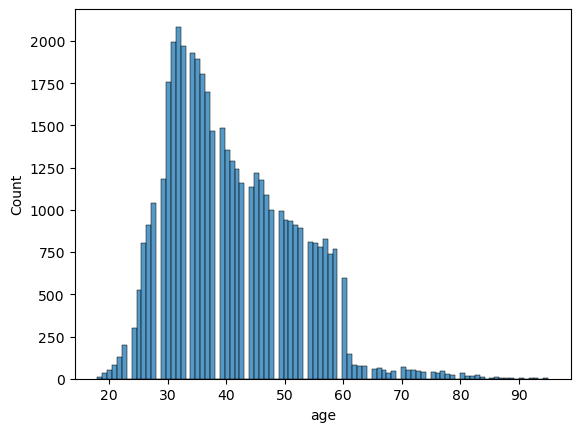

In [162]:
#Thống kê số lượng thuộc tính tuổi (age)
sns.histplot(data=df, x="age")

**Nhận xét**: 
+ Bộ dữ liệu tập trung khảo sát trong độ tuổi thanh niên, trung niên
+ Độ tuổi từ 30-40 chiếm số lượng dữ liệu nhiều nhất

<AxesSubplot:xlabel='marital', ylabel='Count'>

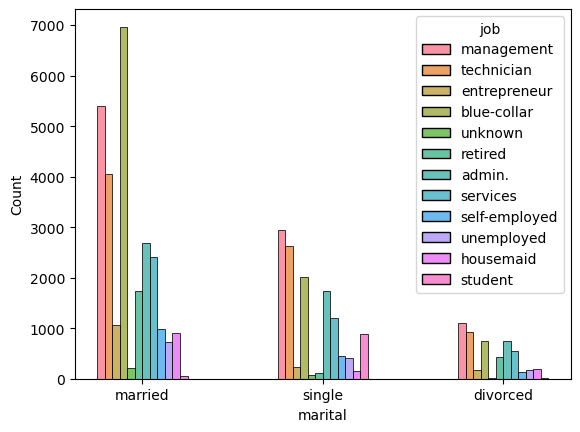

In [163]:
# Biểu đồ khảo sát sự liên quan giữa thuộc tính Tình trạng hôn nhân (marital) - nghề nghiệp (job)
sns.histplot(data=df, x="marital", hue="job", multiple="dodge", shrink=0.5)

**Nhận xét**: 

   + Công nhân (blue-collar) có tỷ lệ kết hôn cao nhất 
   
   + Quản lý (management) có tỷ lệ độc thân và ly hôn cao nhất 
   

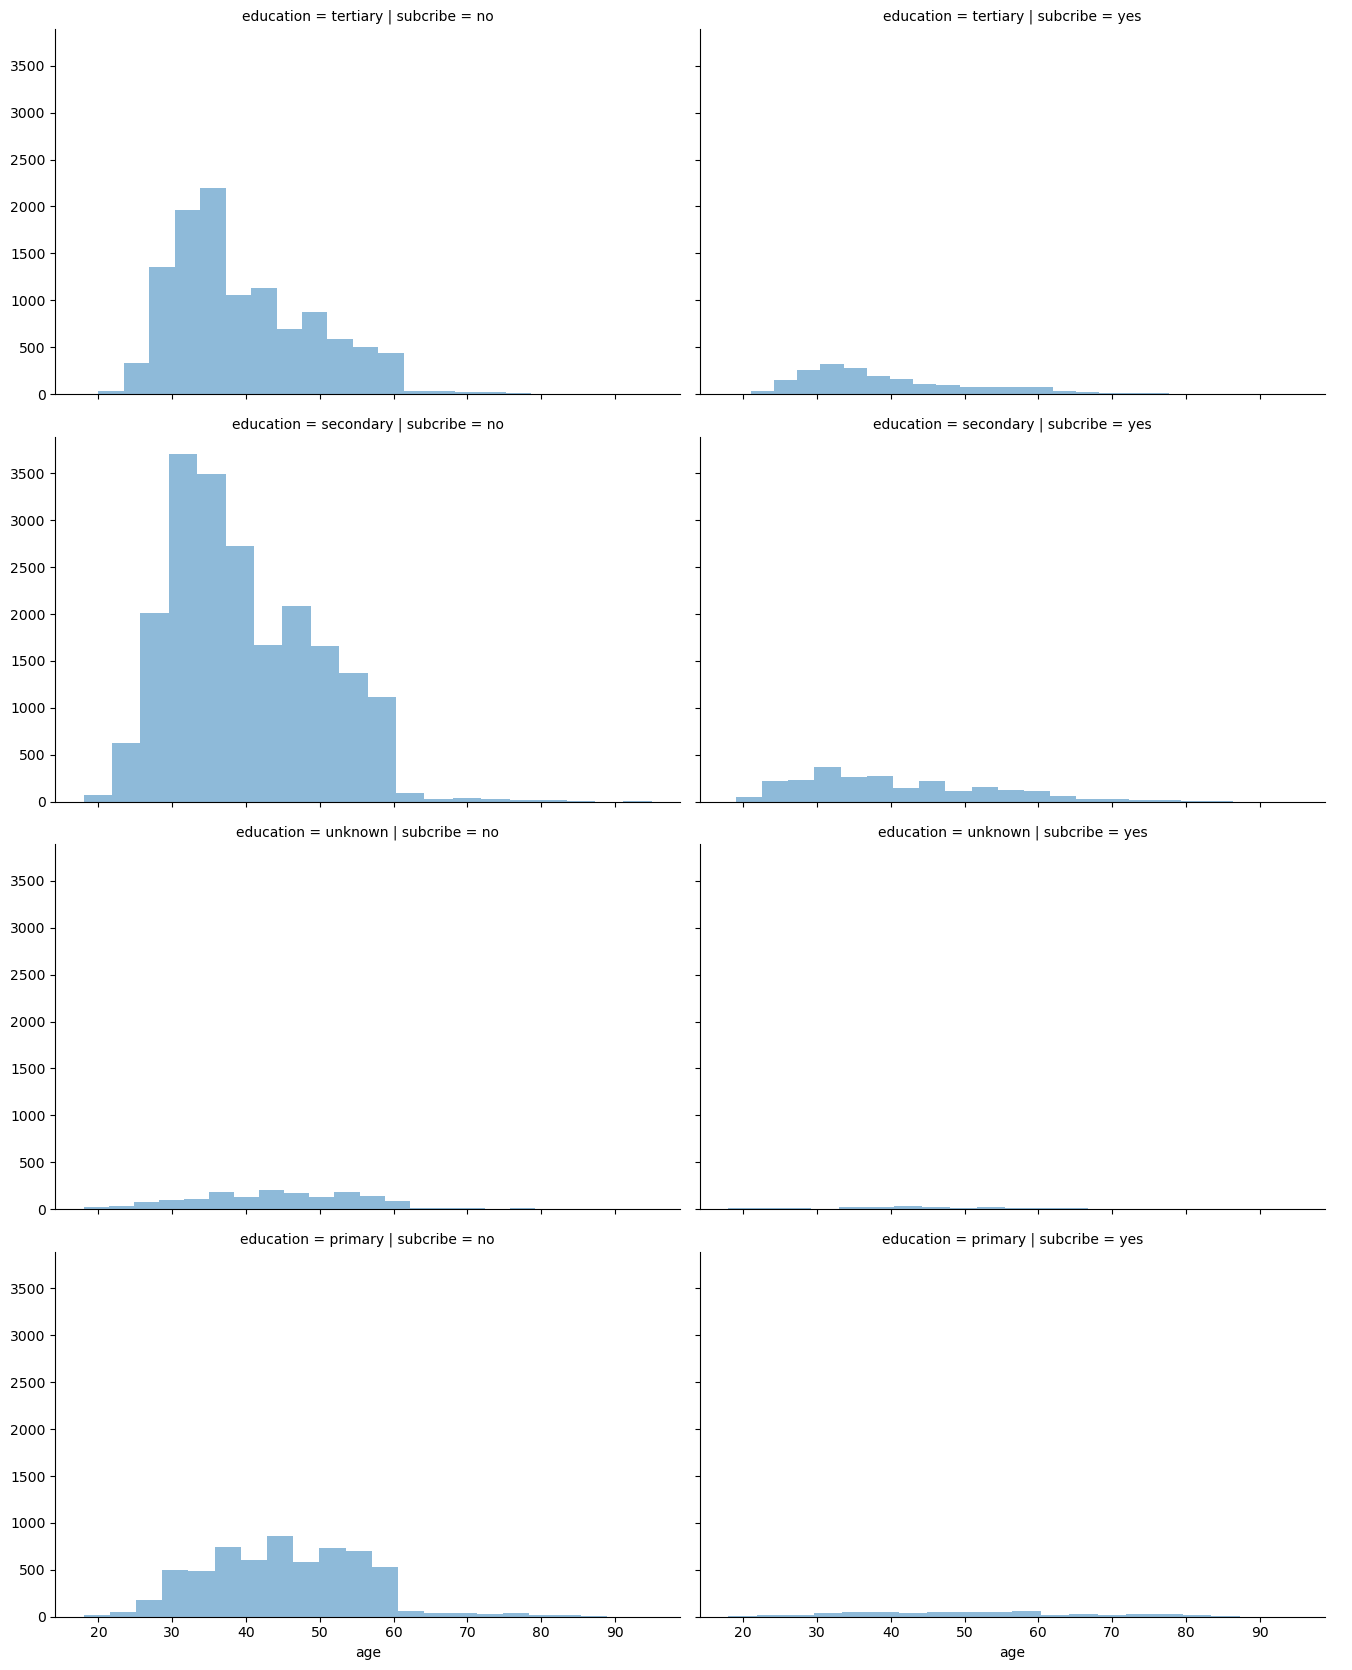

In [164]:
grid =sns.FacetGrid(df, col = 'subcribe', row='education', height=4.2, aspect=1.6)
grid.map(plt.hist,'age', alpha=.5, bins=20) 
grid.add_legend();

Biểu đồ trên đã thể hiện:
+ Tỷ lệ đăng kí gửi tiền của người có education là tertiary và secondary là chiếm ưu thế.
+ Những người có education là unknown và primary thì có tỷ lệ đăng kí gửi tiền thấp .

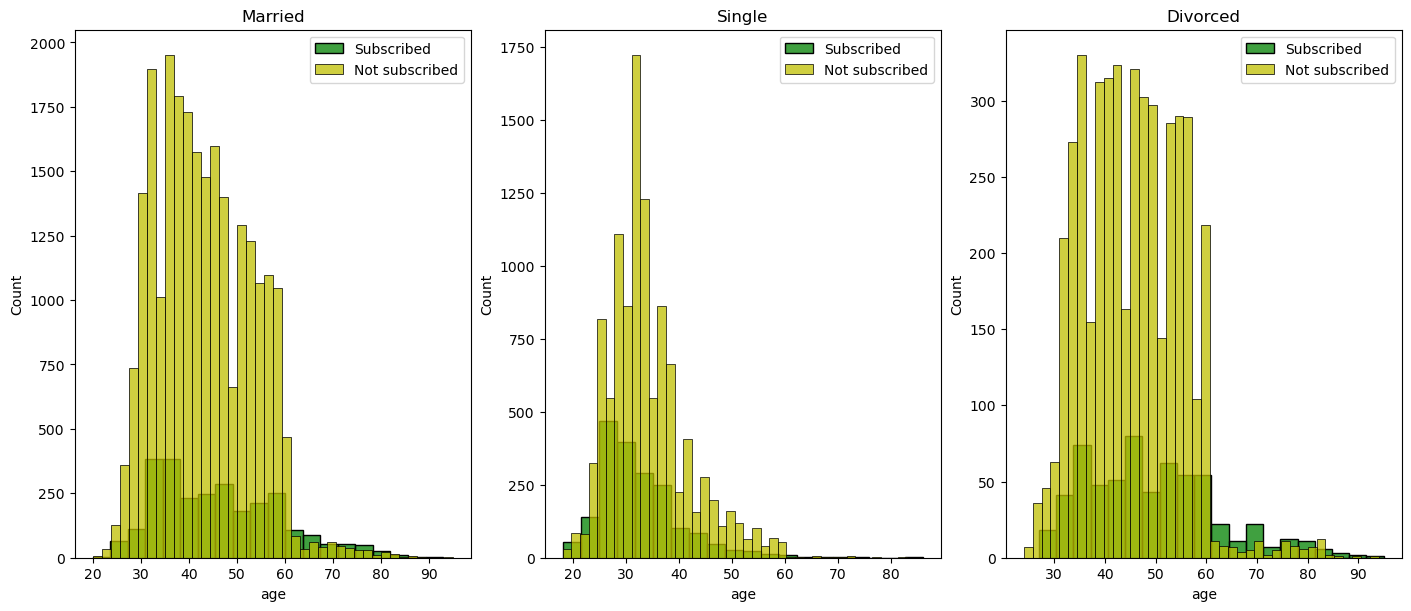

In [165]:
# Vẽ biểu đồ khảo sát sự liên quan giữa tình trạng hôn nhân (marital), tuổi (age) và thuộc tính quyết định 
married = df[df['marital'] == 'married']
single = df[df['marital'] == 'single']
divorced = df[df['marital'] == 'divorced']

fig, axes =  plt.subplots(nrows=1, ncols=3, figsize=(14, 6), constrained_layout=True)

ax = sns.histplot(married[married['subcribe'] == 'yes'].age, bins=20, label='Subscribed', ax=axes[0], kde=False, color='g')
ax = sns.histplot(married[married['subcribe'] == 'no'].age, bins=40, label='Not subscribed', ax=axes[0], kde=False, color='y')
ax.legend()
ax.set_title('Married')

ax = sns.histplot(single[single['subcribe'] == 'yes'].age, bins=20, label='Subscribed', ax=axes[1], kde=False, color='g')
ax = sns.histplot(single[single['subcribe'] == 'no'].age, bins=40, label='Not subscribed', ax=axes[1], kde=False, color='y')
ax.legend()
ax.set_title('Single')

ax = sns.histplot(divorced[divorced['subcribe'] == 'yes'].age, bins=20, label='Subscribed', ax=axes[2], kde=False, color='g')
ax = sns.histplot(divorced[divorced['subcribe'] == 'no'].age, bins=40, label='Not subscribed', ax=axes[2], kde=False, color='y')
ax.legend()
ax.set_title('Divorced')

plt.show()

Biểu đồ trên đã thể hiện số người đăng kí gửi tiền có tình trạng ly hôn hoặc kết hôn trong độ tuổi từ 60 cao hơn so với tình trạng độc thân.

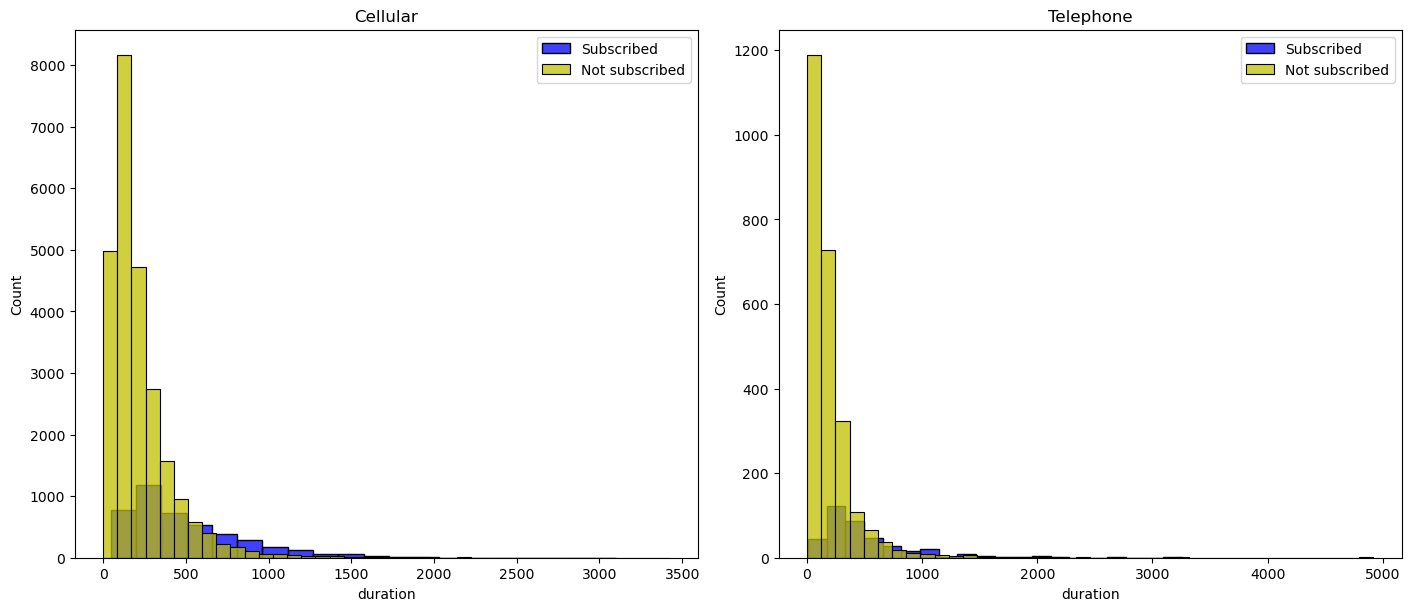

In [166]:
# Biểu đồ khảo sát sự liên quan giữa phương thức liên lạc (contact), khoảng thời gian gọi (duration) và thuộc tính quyết định 
cellular = df[df['contact'] == 'cellular']
telephone = df[df['contact'] == 'telephone']

fig, axes =  plt.subplots(nrows=1, ncols=2, figsize=(14, 6), constrained_layout=True)

ax = sns.histplot(cellular[cellular['subcribe'] == 'yes'].duration, bins=20, label='Subscribed', ax=axes[0], kde=False, color='b')
ax = sns.histplot(cellular[cellular['subcribe'] == 'no'].duration, bins=40, label='Not subscribed', ax=axes[0], kde=False, color='y')
ax.legend()
ax.set_title('Cellular')

ax = sns.histplot(telephone[telephone['subcribe'] == 'yes'].duration, bins=20, label='Subscribed', ax=axes[1], kde=False, color='b')
ax = sns.histplot(telephone[telephone['subcribe'] == 'no'].duration, bins=40, label='Not subscribed', ax=axes[1], kde=False, color='y')
ax.legend()
ax.set_title('Telephone')

plt.show()

**Nhận xét**:
+ Hình thức liên lạc bằng di động có tỷ lệ đăng ký cao hơn so với liên lạc điện thoại bàn
+ Khi cuộc điện thoại không được thực hiện hay không liên lạc được, khách hàng sẽ không đăng kí
+ Khi thời lượng liên lạc dài hơn, tỷ lệ đăng ký sẽ cao hơn trong cả hai trường hợp 

<AxesSubplot:xlabel='poutcome', ylabel='subscribe'>

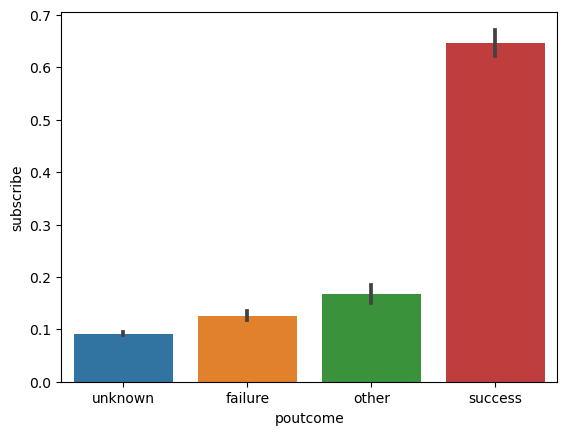

In [167]:
# Xem xét chiến dịch tiếp thị trước đó có ảnh hưởng đến thuộc tính quyết định
df_change = df.copy()
df_change['subscribe'] = df_change['subcribe'].map({'yes': 1, 'no': 0})

sns.barplot(x='poutcome', y='subscribe', data=df_change)

Khả năng khách hàng đăng ký có tỷ lệ cao hơn nếu chiến dịch tiếp thị trước đó với khách hàng thành công.

### Xử lý dữ liệu

In [169]:
# Chuyển đổi thuộc tính default, housing, loan, contact, poutcome, subcribe, marital, education thành số.
df['subcribe'] = df['subcribe'].map({'yes': 1, 'no': 0})
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})    
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})    
df['contact'] = df['contact'].map({'unknown':0,'telephone': 1, 'cellular': 2})
df['poutcome'] = df['poutcome'].map({'unknown':0,'other':0,'failure':0,'success':1}) #quy về 2 mức thành công hoặc không
df['education'] = df['education'].map({'unknown':0,'secondary':2,'primary':1,'tertiary':3}) # phân cấp theo trình độ
df['marital'] = df['marital'].map({'married':2,'divorced':1,'single':0})

In [170]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [171]:
df['day'].describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [172]:
#Từ quan sát trên, ta chia thuộc tính day, thành 3 giỏ [1,11), [11,21), [21,3]
for dataset in [df]:
    dataset['day'] = dataset['day'].astype(int)
    dataset.loc[ dataset['day'] < 11, 'day'] = 0
    dataset.loc[(dataset['day'] >= 11) & (dataset['day'] < 21), 'day'] = 1
    dataset.loc[ dataset['day'] >= 21, 'day'] = 2

In [173]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [174]:
# Tuổi nhỏ nhất là 18 và lớn nhất là 95, ta chia các giỏ như sau:
for dataset in [df]:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[(dataset['age'] <= 18), 'age'] =0
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] =1
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] =2
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] =3
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 40), 'age'] =4
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 66), 'age'] =5
    dataset.loc[ dataset['age'] > 66, 'age'] = 6

In [175]:
# Min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['scaled_balance']] = scaler.fit_transform(df[['balance']])
df[['scaled_duration']] = scaler.fit_transform(df[['duration']])
df[['scaled_pdays']]= scaler.fit_transform(df[['pdays']])

In [176]:
df = df.drop(['balance'],axis=1)
df = df.drop(['duration'],axis=1)
df = df.drop(['pdays'],axis=1)

In [177]:
# Nghề nghiệp chia thành 4 nhóm tương ứng với số: Không biết/Không việc làm:0, Đi học:1, Có việc làm:2, Nghỉ hưu:3
m = {'admin.':2,'unknown':0,'unemployed':0,'management':2,'housemaid':2,'entrepreneur':2,'student':1,\
        'blue-collar':2,'self-employed':2,'retired':3,'technician':2,'services':2}
df['job'] = df['job'].map(m)

In [178]:
# Thuộc tính 'month' chia thành 4 nhóm tương ứng với 4 quý và có giá trị lần lượt từ 0-3:
month = {'may':1,'jul':2 ,'aug':2 ,'jun':1,'nov':3,'apr':1 ,'feb':0 ,    \
        'jan':0,'oct':3,'sep':2, 'mar':0 ,'dec':3} 
df['month'] = df['month'].map(month)

In [179]:
# Bộ dữ liệu sau khi xử lý
df

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,previous,poutcome,subcribe,scaled_balance,scaled_duration,scaled_pdays
0,5,2,2,3,0,1,0,0,0,1,1,0,0,0,0.092259,0.053070,0.000000
1,5,2,0,2,0,1,0,0,0,1,1,0,0,0,0.073067,0.030704,0.000000
2,3,2,2,2,0,1,1,0,0,1,1,0,0,0,0.072822,0.015453,0.000000
3,5,2,2,0,0,1,0,0,0,1,1,0,0,0,0.086476,0.018707,0.000000
4,3,0,0,0,0,0,0,0,0,1,1,0,0,0,0.072812,0.040260,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,5,2,2,3,0,0,0,2,1,3,3,0,0,1,0.080293,0.198658,0.000000
45207,6,3,1,1,0,0,0,2,1,3,2,0,0,1,0.088501,0.092721,0.000000
45208,6,3,2,2,0,0,0,2,1,3,5,3,1,1,0.124689,0.229158,0.212156
45209,5,2,2,2,0,0,0,1,1,3,4,0,0,0,0.078868,0.103294,0.000000
